C:\Users\Lynnj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lynnj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lynnj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


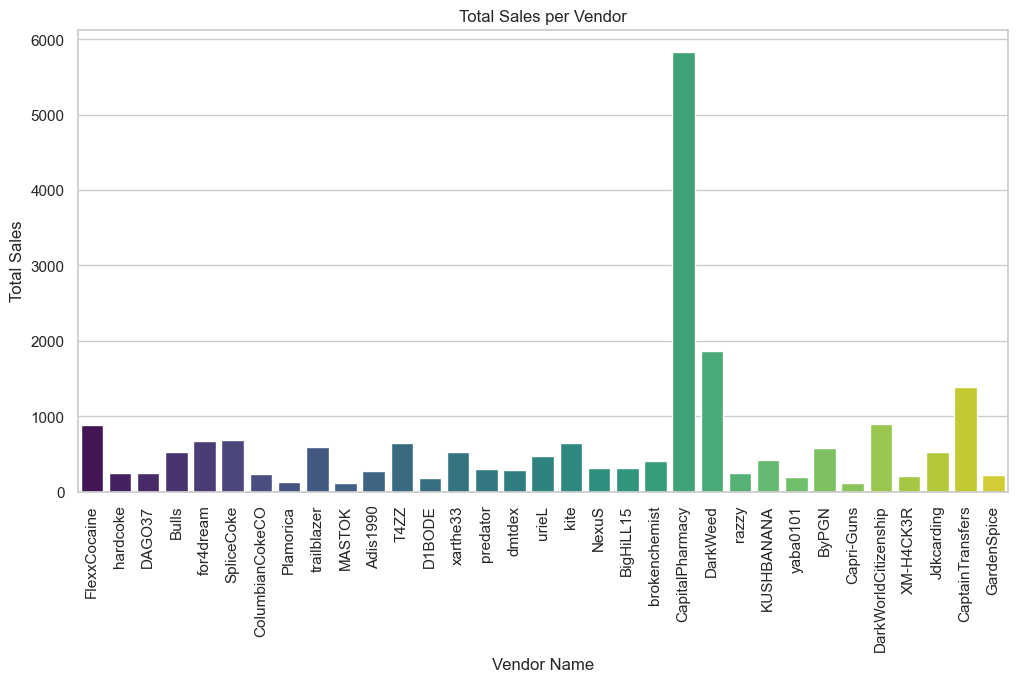

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df2 = pd.read_csv('df2F.csv')

df2['DOJ'] = pd.to_datetime(df2['DOJ'], format='%d.%m.%Y')
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='Vendor Name', y='Total Sales', data=df2, palette="viridis")
plt.title('Total Sales per Vendor')
plt.xticks(rotation=90)
plt.show()
total_sales_over_time = df2.groupby('DOJ')['Total Sales'].sum().reset_index()

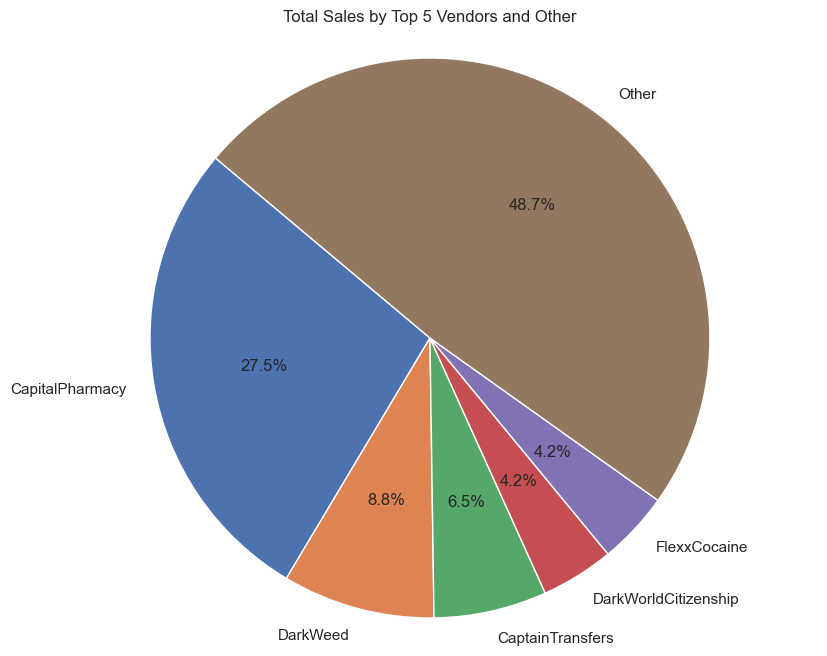

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df2 = pd.read_csv('df2F.csv')

total_sales_by_vendor = df2.groupby('Vendor Name')['Total Sales'].sum()
top_5_vendors = total_sales_by_vendor.nlargest(5)
other_sales = total_sales_by_vendor[~total_sales_by_vendor.index.isin(top_5_vendors.index)].sum()
sales_combined = pd.concat([top_5_vendors, pd.Series({'Other': other_sales})])

plt.figure(figsize=(10, 8))
plt.pie(sales_combined, labels=sales_combined.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Sales by Top 5 Vendors and Other')
plt.axis('equal')  
plt.show()



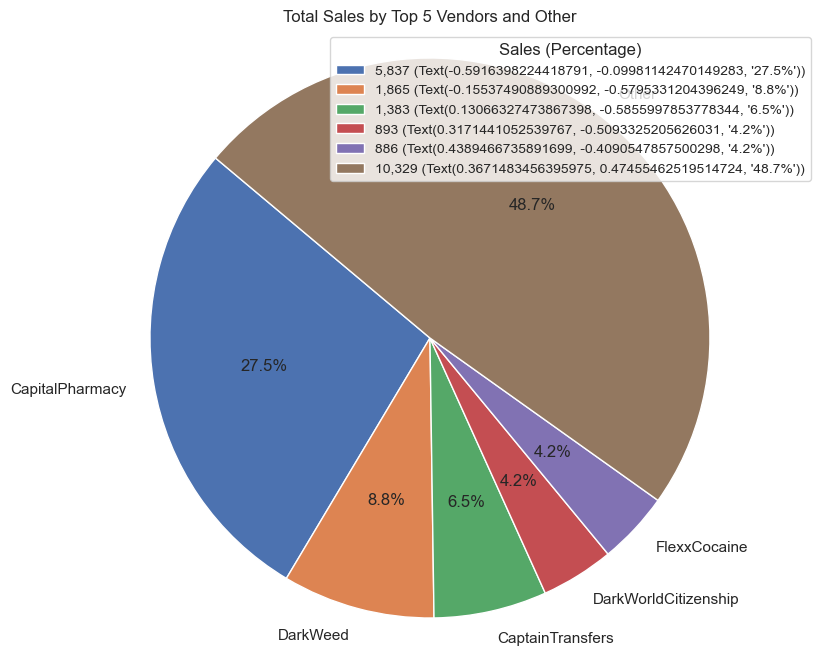

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df2 = pd.read_csv('df2F.csv')
total_sales_by_vendor = df2.groupby('Vendor Name')['Total Sales'].sum()
top_5_vendors = total_sales_by_vendor.nlargest(5)

other_sales = total_sales_by_vendor[~total_sales_by_vendor.index.isin(top_5_vendors.index)].sum()
sales_combined = pd.concat([top_5_vendors, pd.Series({'Other': other_sales})])

plt.figure(figsize=(10, 8))
patches, texts, autotexts = plt.pie(sales_combined, labels=sales_combined.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Sales by Top 5 Vendors and Other')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

sales_numbers = [f'{sales_combined[index]:,.0f}' for index in sales_combined.index]
percentage_numbers = [f'{percent}' for percent in autotexts]
combined_text = [f'{sales_numbers[i]} ({percentage_numbers[i]})' for i in range(len(sales_numbers))]

plt.legend(patches, combined_text, loc="best", fontsize='small', title='Sales (Percentage)')
plt.show()
